Using scikit-learn

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [100]:
data = pd.read_csv('Hackathon_Ideal_Data.csv')

In [101]:
data.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [120]:
stld_data = data[["VALUE","QTY"]]

#statistic of the data
stld_data.describe()

,VALUE,QTY
count,14260.000000,14260.000000
mean,294.455330,16.354488
std,760.129558,34.365583
min,0.000000,0.000000
25%,10.000000,1.000000
50%,99.000000,4.000000
75%,283.000000,16.000000
max,24185.000000,641.000000


In [121]:
#standadizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(stld_data)

#statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,1.426000e+04,1.426000e+04
mean,-2.151388e-15,-4.157158e-15
std,1.000035e+00,1.000035e+00
min,-3.873888e-01,-4.759140e-01
25%,-3.742327e-01,-4.468141e-01
50%,-2.571432e-01,-3.595144e-01
75%,-1.507076e-02,-1.031557e-02
max,3.143067e+01,1.817712e+01


(-2.0, 20.0)

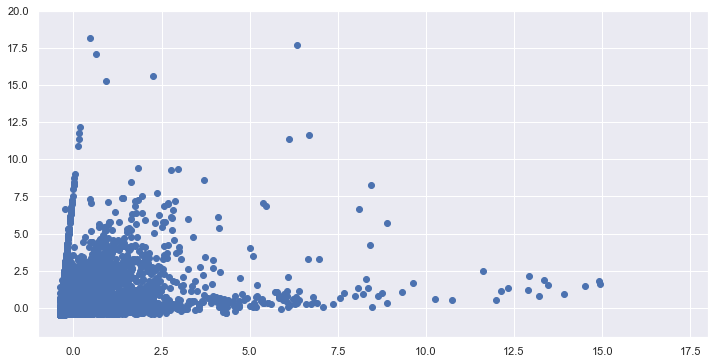

In [122]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-1,18)
plt.ylim(-2,20)

In [123]:
# defining the k means function with initialization as random
kmeans = KMeans(n_clusters=2, init='random')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [124]:
# save new cluster for chart
y_km = kmeans.fit_predict(data_scaled)

(-2.0, 20.0)

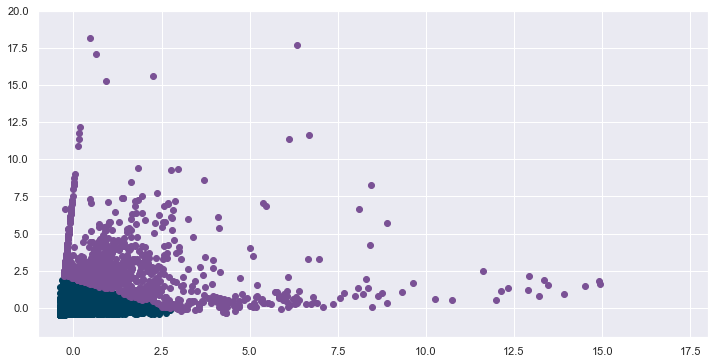

In [125]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km == 0,1], c='#003f5c')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km == 1,1], c='#7a5195')

plt.xlim(-1,18)
plt.ylim(-2,20)

In [126]:
# inertia on the fitted data
kmeans.inertia_

16985.764005478803

Text(0, 0.5, 'Inertia')

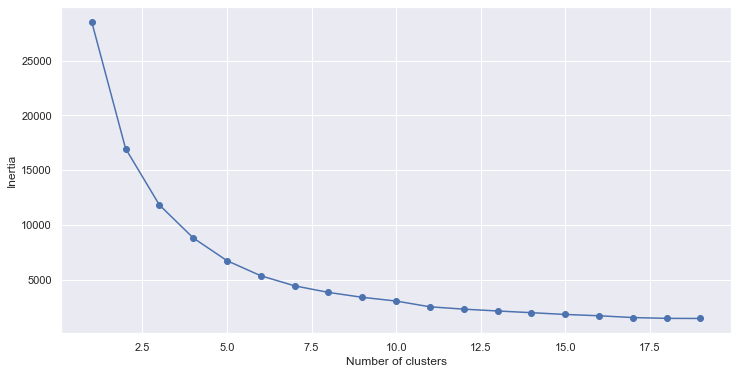

In [127]:
# fitting multiple k means algorithm and storing the values in a empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

#converting the results into a dataframe and plotting them    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [111]:
# k-means using 3 clusters and random initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='random')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [112]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    13268
0      864
2      128
Name: cluster, dtype: int64

In [113]:
# inertia on the fitted data
kmeans.inertia_

11845.98010097892

In [114]:
# save new cluster for chart
y_km = kmeans.fit_predict(data_scaled)

(-4.0, 7.0)

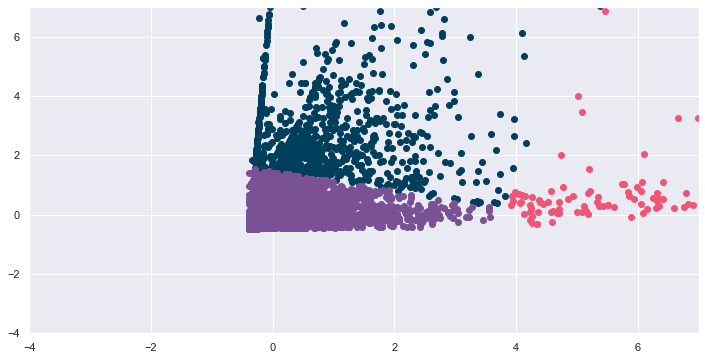

In [78]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km == 0,1], c='#003f5c')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km == 1,1], c='#7a5195')
plt.scatter(data_scaled[y_km ==2,0], data_scaled[y_km == 2,1], c='#ef5675')
plt.xlim(-1,18)
plt.ylim(-2,20)

In [79]:
# k-means using 4 clusters and random initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='random')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [80]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    12062
0     1837
3      274
2       87
Name: cluster, dtype: int64

In [81]:
# inertia on the fitted data
kmeans.inertia_

8843.004796824735

In [82]:
# save new cluster for chart
y_km = kmeans.fit_predict(data_scaled)

(-4.0, 7.0)

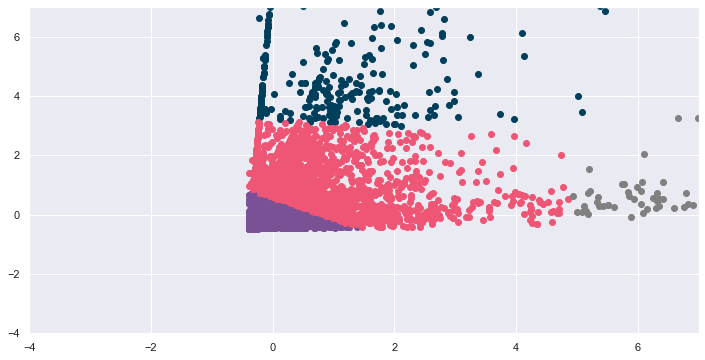

In [83]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km == 0,1], c='#003f5c')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km == 1,1], c='#7a5195')
plt.scatter(data_scaled[y_km ==2,0], data_scaled[y_km == 2,1], c='#ef5675')
plt.scatter(data_scaled[y_km ==3,0], data_scaled[y_km == 3,1], c='#808080')
plt.xlim(-1,18)
plt.ylim(-2,20)

In [84]:
# k-means using 5 clusters and random initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='random')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [85]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    11916
0     1859
3      269
2      195
4       21
Name: cluster, dtype: int64

In [86]:
# inertia on the fitted data
kmeans.inertia_

6768.746718729466

In [87]:
# save new cluster for chart
y_km = kmeans.fit_predict(data_scaled)

(-4.0, 7.0)

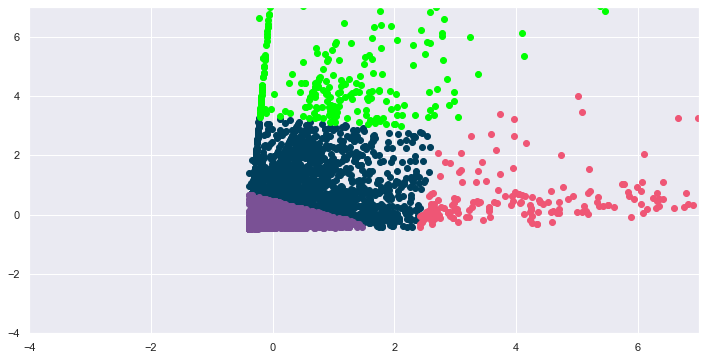

In [95]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km == 0,1], c='#003f5c')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km == 1,1], c='#7a5195')
plt.scatter(data_scaled[y_km ==2,0], data_scaled[y_km == 2,1], c='#ef5675')
plt.scatter(data_scaled[y_km ==3,0], data_scaled[y_km == 3,1], c='#808080')
plt.scatter(data_scaled[y_km ==4,0], data_scaled[y_km == 4,1], c='#00ff00')
plt.xlim(-1,18)
plt.ylim(-2,20)

Kesimpulan: 

1. Semakin tinggi jumlah cluster makan inersia semakin rendah